In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
columns_name = [
    'timestamp','sex','matric_gpa_%' ,'study_year','faculty','gpa_%_2023','accommodation_status',
    'monthly_allowance','scholarship','study_hours_week','socialising_week','drinks_night',
    'classes_missed','modules_failed','in_relationship','parental_approval','relationship_parents'
]

student_data = pd.read_csv("student_survey.csv", names = columns_name, header = 0)

In [3]:
student_data.head()

,timestamp,sex,matric_gpa_%,study_year,faculty,gpa_%_2023,accommodation_status,monthly_allowance,scholarship,study_hours_week,socialising_week,drinks_night,classes_missed,modules_failed,in_relationship,parental_approval,relationship_parents
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


## Manipulation and/or Cleaning Data

* remove unnecessary columns
* Null Value Handling <- Imputation
* Outliers Handling
* Feature Selection

In [4]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             406 non-null    object 
 1   sex                   404 non-null    object 
 2   matric_gpa_%          399 non-null    float64
 3   study_year            333 non-null    object 
 4   faculty               399 non-null    object 
 5   gpa_%_2023            320 non-null    float64
 6   accommodation_status  383 non-null    object 
 7   monthly_allowance     375 non-null    object 
 8   scholarship           398 non-null    object 
 9   study_hours_week      403 non-null    object 
 10  socialising_week      404 non-null    object 
 11  drinks_night          404 non-null    object 
 12  classes_missed        403 non-null    object 
 13  modules_failed        403 non-null    object 
 14  in_relationship       403 non-null    object 
 15  parental_approval     4

In [5]:
# Deleting Timestamp column
student_data.drop('timestamp', axis=1, inplace = True)

In [6]:
student_data.head()

,sex,matric_gpa_%,study_year,faculty,gpa_%_2023,accommodation_status,monthly_allowance,scholarship,study_hours_week,socialising_week,drinks_night,classes_missed,modules_failed,in_relationship,parental_approval,relationship_parents
0,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [7]:
# Handling Null values
student_data.isna().sum()

sex                      2
matric_gpa_%             7
study_year              73
faculty                  7
gpa_%_2023              86
accommodation_status    23
monthly_allowance       31
scholarship              8
study_hours_week         3
socialising_week         2
drinks_night             2
classes_missed           3
modules_failed           3
in_relationship          3
parental_approval        4
relationship_parents     3
dtype: int64

In [10]:
# Removing conditional null values related to target
null_index = student_data[student_data[["study_year","gpa_%_2023"]].isna().sum(axis=1) > 1].index

student_data.drop(null_index, axis = 0, inplace =True)

In [11]:
student_data.isna().sum()

sex                      0
matric_gpa_%             3
study_year               1
faculty                  4
gpa_%_2023              14
accommodation_status     4
monthly_allowance       15
scholarship              0
study_hours_week         0
socialising_week         0
drinks_night             0
classes_missed           1
modules_failed           0
in_relationship          1
parental_approval        2
relationship_parents     1
dtype: int64

In [12]:
# If more than 5 columns null in a row
student_data = student_data[~(student_data.isna().sum(axis=1) >= 5)]

In [13]:
student_data.isna().sum()

sex                      0
matric_gpa_%             3
study_year               1
faculty                  4
gpa_%_2023              14
accommodation_status     4
monthly_allowance       15
scholarship              0
study_hours_week         0
socialising_week         0
drinks_night             0
classes_missed           1
modules_failed           0
in_relationship          1
parental_approval        2
relationship_parents     1
dtype: int64

In [16]:
# filling categorical columns with mode
columns_to_fill = [
    'accommodation_status','monthly_allowance','scholarship','study_hours_week','faculty','study_year',
    'classes_missed','modules_failed','in_relationship','parental_approval','relationship_parents'
]
student_data.fillna(
    student_data[columns_to_fill].mode().loc[0], inplace=True
)

In [17]:
student_data.isna().sum()

sex                      0
matric_gpa_%             3
study_year               0
faculty                  0
gpa_%_2023              14
accommodation_status     0
monthly_allowance        0
scholarship              0
study_hours_week         0
socialising_week         0
drinks_night             0
classes_missed           0
modules_failed           0
in_relationship          0
parental_approval        0
relationship_parents     0
dtype: int64

In [18]:
# Imputing continuous numerical value
mean_gpa = student_data["matric_gpa_%"].mean()
student_data["matric_gpa_%"].fillna(mean_gpa, inplace=True)

mean_gpa = student_data["gpa_%_2023"].mean()
student_data["gpa_%_2023"].fillna(mean_gpa, inplace=True)


/tmp/ipykernel_27460/4218381368.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  student_data["matric_gpa_%"].fillna(mean_gpa, inplace=True)
/tmp/ipykernel_27460/4218381368.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [19]:
student_data.isna().sum()

sex                     0
matric_gpa_%            0
study_year              0
faculty                 0
gpa_%_2023              0
accommodation_status    0
monthly_allowance       0
scholarship             0
study_hours_week        0
socialising_week        0
drinks_night            0
classes_missed          0
modules_failed          0
in_relationship         0
parental_approval       0
relationship_parents    0
dtype: int64

In [21]:
# Outlier Handling
student_data[['matric_gpa_%','gpa_%_2023']].describe()

,matric_gpa_%,gpa_%_2023
count,334.000000,334.000000
mean,78.047402,66.268469
std,6.623199,8.953543
min,55.000000,30.000000
25%,74.000000,60.000000
50%,78.000000,65.000000
75%,83.000000,73.000000
max,99.000000,95.220000


<Axes: >

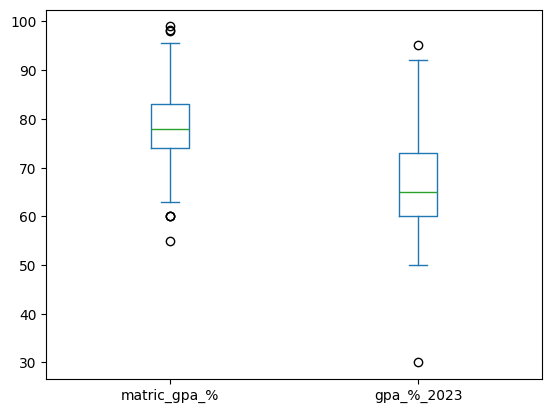

In [22]:
student_data[['matric_gpa_%','gpa_%_2023']].plot.box()

In [23]:
# Handling Outlier with IQR
def handle_outlier(
    dataframe : pd.DataFrame, columns: list[str]
):
    """
    DocString
    """
    for each_col in columns:
        print(f"Working for {each_col} column")
        series = dataframe[each_col]
        
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3-q1
        max_v = q3 + 1.5 * iqr
        min_v = q1 - 1.5 * iqr

        to_drop = series[(series > max_v) | (series < min_v)].index
        print(f"Dropping {to_drop} indexes")

        dataframe = dataframe.drop(to_drop, axis = 0, inplace = False)

    return dataframe

In [24]:
student_data_no_outlier = handle_outlier(student_data, ['matric_gpa_%','gpa_%_2023'])

Working for matric_gpa_% column
Dropping Index([38, 54, 73, 203, 268, 335, 358], dtype='int64') indexes
Working for gpa_%_2023 column
Dropping Index([303], dtype='int64') indexes


In [27]:
# def handle_outlier(series: pd.Series) -> pd.Series:
#     """
#     Handle outliers in a Pandas Series using the IQR method.
#     """
#     q1 = series.quantile(0.25)
#     q3 = series.quantile(0.75)
#     iqr = q3 - q1
#     max_v = q3 + 1.5 * iqr
#     min_v = q1 - 1.5 * iqr
    
#     return series[(series >= min_v) & (series <= max_v)]

# columns = ['matric_gpa_%','gpa_%_2023']
# student_data[columns] = student_data[columns].apply(handle_outlier)

In [28]:
student_data_no_outlier.to_csv("student_survey_clean.csv", index= False)